In [3]:
import cv2
import numpy as np

img = cv2.imread("shapes.jpg", cv2.IMREAD_GRAYSCALE)
_, threshold = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

font = cv2.FONT_HERSHEY_COMPLEX

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    
    cv2.drawContours(img, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]

    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), font, 1, (0))
    elif len(approx) == 4:
        cv2.putText(img, "Rectangle", (x, y), font, 1, (0))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), font, 1, (0))
    elif 6 < len(approx) < 15:
        cv2.putText(img, "Ellipse", (x, y), font, 1, (0))
    else:
        cv2.putText(img, "Circle", (x, y), font, 1, (0))

#cv2.imshow("shapes", img)
#cv2.imshow("Threshold", threshold)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

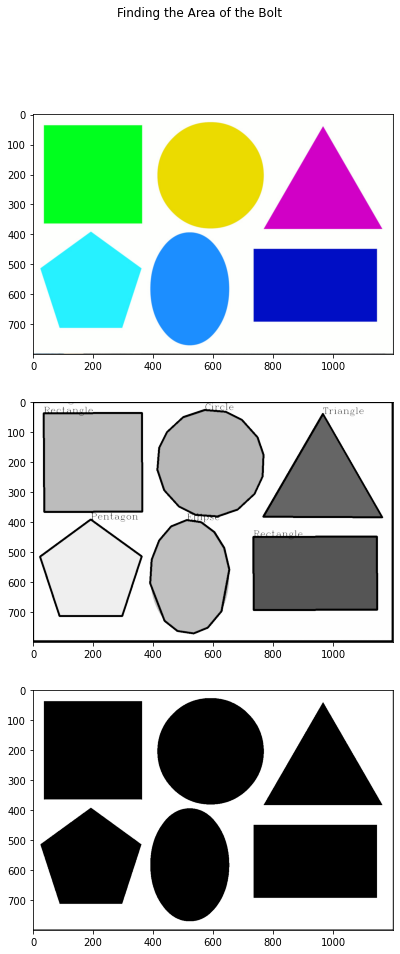

In [9]:
import matplotlib.pyplot as plt

org_img = cv2.imread("shapes.jpg")

fig, axs = plt.subplots(3,figsize=(15,15))

fig.suptitle('Finding the Area of the Bolt')
axs[0].imshow(org_img)
axs[1].imshow(img,cmap='Greys_r')
axs[2].imshow(threshold,cmap='Greys_r')